<a href="https://colab.research.google.com/github/sadikinisaac/irisflower/blob/master/cov_cor_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Covariance and Correlation

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Iris_Data.csv to Iris_Data.csv


In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn.apionly as sns
%matplotlib inline

/usr/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  self[key] = other[key]
/usr/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/usr/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  self[key] = other[key]
/usr/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/usr/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  

In [3]:
import io
df = pd.read_csv(io.BytesIO(uploaded['Iris_Data.csv']))

df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


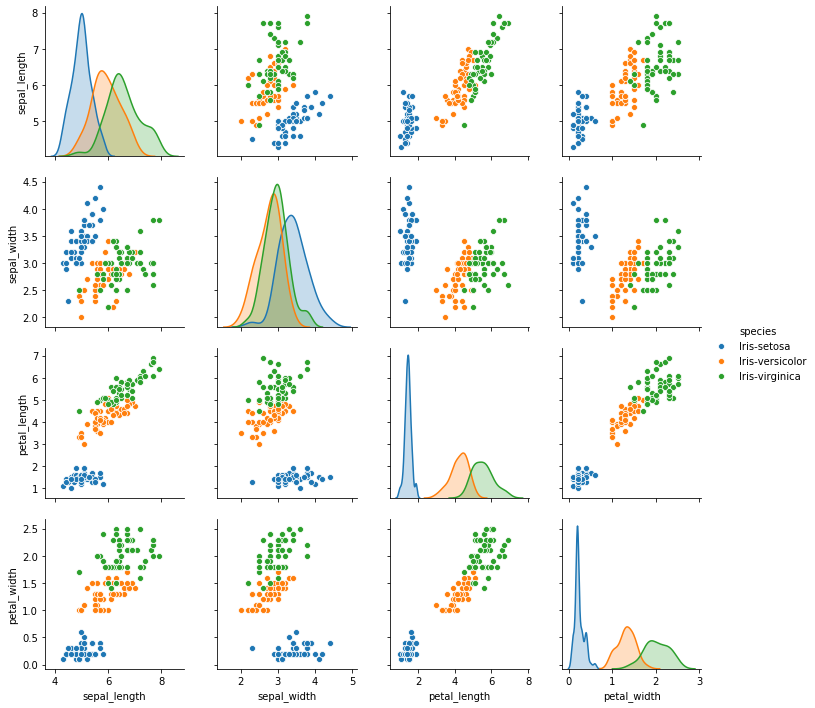

In [4]:
# create scatterplot matrix
fig = sns.pairplot(data=df, 
                   hue='species')

plt.show()

In [5]:
X = df[df.columns[:-1]].values
X.shape

(150, 4)

In [6]:
x_mean, y_mean = np.mean(X[:, 2:4], axis=0)

sum([(x - x_mean) * (y - y_mean) 
     for x, y in zip(X[:, 2], X[:, 3])]) / (X.shape[0] - 1)

1.2963874720357946

In [7]:
np.cov(X.T)

array([[ 0.68569351, -0.03926846,  1.27368233,  0.5169038 ],
       [-0.03926846,  0.18800403, -0.32171275, -0.11798121],
       [ 1.27368233, -0.32171275,  3.11317942,  1.29638747],
       [ 0.5169038 , -0.11798121,  1.29638747,  0.58241432]])

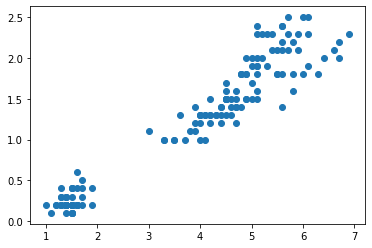

In [8]:
plt.scatter(X[:, 2], X[:, 3])

In [9]:
(np.cov(X[:, 2:4].T)[0, 1] / 
 (np.std(X[:, 2], ddof=1) * np.std(X[:, 3], ddof=1)))

0.9627570970509666

In [10]:
(np.cov(X[:, 2:4].T, ddof=0)[0, 1] / 
 (np.std(X[:, 2], ddof=0) * np.std(X[:, 3], ddof=0)))

0.9627570970509667

In [11]:
np.corrcoef(X[:, 2:4].T)

array([[1.       , 0.9627571],
       [0.9627571, 1.       ]])

In [12]:
stats.pearsonr(X[:, 2], X[:, 3])


(0.9627570970509661, 5.776660988496418e-86)

In [0]:
#The p-value roughly indicates the probability of 
#an uncorrelated system producing datasets that have 
#a Pearson correlation at least as extreme as the one computed from these datasets. 
#The p-values are not entirely reliable but are probably reasonable 
#for datasets larger than 500 or so.
#(https://docs.scipy.org/doc/scipy-0.19.0/reference/generated/scipy.stats.pearsonr.html)

In [0]:
#About Scaled Variables

In [0]:
standardized = (X - X.mean()) / X.std()

In [0]:
#Pearson unaffected

In [14]:
np.corrcoef(X.T)

array([[ 1.        , -0.10936925,  0.87175416,  0.81795363],
       [-0.10936925,  1.        , -0.4205161 , -0.35654409],
       [ 0.87175416, -0.4205161 ,  1.        ,  0.9627571 ],
       [ 0.81795363, -0.35654409,  0.9627571 ,  1.        ]])

In [15]:
np.corrcoef(standardized.T)

array([[ 1.        , -0.10936925,  0.87175416,  0.81795363],
       [-0.10936925,  1.        , -0.4205161 , -0.35654409],
       [ 0.87175416, -0.4205161 ,  1.        ,  0.9627571 ],
       [ 0.81795363, -0.35654409,  0.9627571 ,  1.        ]])

In [0]:
# Covariance affected

In [16]:
np.cov(X.T)

array([[ 0.68569351, -0.03926846,  1.27368233,  0.5169038 ],
       [-0.03926846,  0.18800403, -0.32171275, -0.11798121],
       [ 1.27368233, -0.32171275,  3.11317942,  1.29638747],
       [ 0.5169038 , -0.11798121,  1.29638747,  0.58241432]])

In [17]:
np.cov(standardized.T)

array([[ 0.17596865, -0.01007741,  0.32686347,  0.13265237],
       [-0.01007741,  0.04824723, -0.08256073, -0.03027737],
       [ 0.32686347, -0.08256073,  0.79893127,  0.33269027],
       [ 0.13265237, -0.03027737,  0.33269027,  0.14946425]])